In [12]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

2.17.0


In [13]:
# dfss = pd.read_parquet(r"D:\RND\Machine_Learning\Datasets/clean_dataset_ml.parquet")
# dfss.fillna(0,inplace=True)
# dfss.drop(['precipitation','lag6', 'lag7','quarter',  'weekofyear', 'year'],axis= 1, inplace= True)
# dfss.loc[dfss['label_sensor_id']==2056] =np.nan
# dfss.dropna(inplace=True)
# df = dfss.copy()
# df['creation_time'] = pd.to_datetime(df['creation_time'])
# df.set_index(['creation_time'],drop= True, inplace= True)
# df.sort_index(inplace=True)
# df.reset_index(drop=True,inplace=True)
# df

In [14]:
dfss = pd.read_parquet(r"D:\RND\Machine_Learning\Datasets/clean_dataset_ml.parquet")
dfss.fillna(0,inplace=True)
dfss.drop(['precipitation','lag6', 'lag7','quarter',  'weekofyear', 'year'],axis= 1, inplace= True)
dfss = dfss[dfss['label_sensor_id']==0]
# dfss.loc[dfss['label_sensor_id']==2056] =np.nan
# dfss.dropna(inplace=True)
df = dfss.copy()
df['creation_time'] = pd.to_datetime(df['creation_time'])
df.set_index(['creation_time'],drop= True, inplace= True)
df.sort_index(inplace=True)
df.reset_index(drop=True,inplace=True)
df

,temperature_2m,relative_humidity_2m,apparent_temperature,wind_speed_10m,wind_speed_100m,consumed_unit,lag1,lag2,lag3,lag4,lag5,day,hour,month,dayofweek,dayofyear,label_sensor_id
0,12.1,95,10.8,11.4,21.6,0.0,0.0,0.0,0.00,0.0,0.00,1,0,1,0,1,0
1,12.1,95,10.8,11.4,21.6,0.5,0.0,0.0,0.00,0.0,0.00,1,0,1,0,1,0
2,12.1,95,10.8,11.4,21.6,0.0,0.5,0.0,0.00,0.0,0.00,1,0,1,0,1,0
3,11.8,95,10.5,11.4,21.6,0.0,0.0,0.5,0.00,0.0,0.00,1,1,1,0,1,0
4,11.8,95,10.5,11.4,21.6,0.0,0.0,0.0,0.00,0.0,0.00,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5367,16.7,41,13.3,12.6,27.0,0.0,0.5,0.0,0.48,0.5,0.00,25,22,2,6,56,0
5368,16.7,41,13.3,12.6,27.0,0.0,0.0,0.5,0.00,0.0,0.52,25,22,2,6,56,0
5369,16.7,41,13.3,12.6,27.0,0.0,0.0,0.0,0.00,0.0,0.00,25,22,2,6,56,0
5370,16.7,41,13.3,12.6,27.0,0.5,0.0,0.0,0.00,0.0,0.00,25,22,2,6,56,0


In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temperature_2m,5372.0,16.923418,5.458852,5.9,12.40,16.5,21.60,30.0
relative_humidity_2m,5372.0,56.294118,20.981854,16.0,40.00,54.0,72.00,100.0
apparent_temperature,5372.0,15.047301,5.758013,3.4,10.10,14.7,20.10,28.2
wind_speed_10m,5372.0,9.141809,3.582866,0.8,7.00,8.9,10.90,30.4
wind_speed_100m,5372.0,16.184698,7.146973,0.4,10.80,16.1,21.50,41.0
consumed_unit,5372.0,3.771776,6.444281,0.0,0.00,0.0,3.50,33.5
lag1,5372.0,3.771776,6.444281,0.0,0.00,0.0,3.50,33.5
lag2,5372.0,3.771683,6.444332,0.0,0.00,0.0,3.50,33.5
lag3,5372.0,3.703924,6.407236,0.0,0.00,0.0,2.00,33.5
lag4,5372.0,3.360108,6.244496,0.0,0.00,0.0,0.52,33.5


In [21]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.8)]
# val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.8):]
print("train_df:",len(train_df),"test_df:",len(test_df))
num_features = df.shape[1]
num_features

train_df: 4297 test_df: 1075


17

In [22]:
train_features = train_df.copy()
test_features = test_df.copy()

train_labels = train_features.pop('consumed_unit')
test_labels = test_features.pop('consumed_unit')

In [24]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))


In [30]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[12.1 95.  10.8 11.4 21.6  0.   0.   0.   0.   0.   1.   0.   1.   0.
   1.   0. ]]

Normalized: [[-0.79  1.73 -0.65  0.93  0.94 -0.58 -0.58 -0.58 -0.52 -0.45 -1.42 -1.66
  -0.67 -1.43 -1.69  0.  ]]


In [49]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
test_results = {}

In [50]:
linear_model.predict(train_features[:10])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


array([[-1.554],
       [-1.554],
       [-1.553],
       [-1.473],
       [-1.46 ],
       [-1.46 ],
       [-1.458],
       [-1.434],
       [-1.421],
       [-1.421]], dtype=float32)

In [51]:

linear_model.layers[1].kernel

linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')


In [52]:

%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: total: 18.4 s
Wall time: 14.6 s


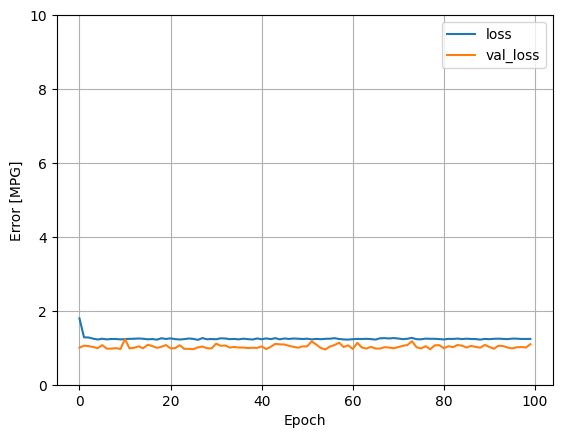

In [53]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)
  
plot_loss(history)


In [54]:

test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [55]:
test_results

{'linear_model': 1.1265811920166016}